# Imports

In [1]:
import sys, os
# from scipy.stats import norm

In [2]:
# Local Module imports
sys.path.append(os.path.abspath(os.path.join('../utils')))
from ordinal_model.ordered_gaussian import OrderedGaussian, OrderedGaussian2
from ordinal_model.ordinal_regression_TF import OrdinalRegression, OrdinalLoss, plot_model

In [3]:
# TF and Numpy
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

In [4]:
# Misc.
# sys.path.append(os.path.abspath(os.path.join('../utils')))
# from ordinal_model.OrdinalRegression import OrdinalRegression, softplus, softplus_inv, plot_model
# import autograd.numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tensor Flow Probability Testing

In [6]:
dist1 = OrderedGaussian(cutpoints=[-2., 0, 2], loc=[0,1,2])
dist1.ordinal_probs()

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[2.2750132e-02, 4.7724986e-01, 4.7724983e-01, 2.2750139e-02],
       [1.3498989e-03, 1.5730536e-01, 6.8268949e-01, 1.5865529e-01],
       [3.1671265e-05, 2.2718463e-02, 4.7724986e-01, 5.0000000e-01]],
      dtype=float32)>

In [7]:
dist2 = OrderedGaussian2(cutpoints=[-2., 0, 2], loc=[0,1,2])
dist2.categorical_probs()

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[2.2750132e-02, 4.7724986e-01, 4.7724983e-01, 2.2750139e-02],
       [1.3498989e-03, 1.5730536e-01, 6.8268949e-01, 1.5865529e-01],
       [3.1671265e-05, 2.2718463e-02, 4.7724986e-01, 5.0000000e-01]],
      dtype=float32)>

In [8]:
dist2

<tfp.distributions.OrderedGaussian2 'OrderedGuassian' batch_shape=[3] event_shape=[] dtype=int32>

In [9]:
loss = OrdinalLoss()
loss([0,0,0], dist2)

<tf.Tensor: shape=(), dtype=float32, numpy=6.9170036>

In [10]:
dist3 = tfp.distributions.OrderedLogistic(cutpoints=[-2., 0, 2], loc=[0., 1., 2.])
dist3.categorical_probs()

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.11920291, 0.38079712, 0.3807971 , 0.11920291],
       [0.04742587, 0.22151555, 0.46211717, 0.26894143],
       [0.01798621, 0.10121672, 0.38079712, 0.5       ]], dtype=float32)>

In [11]:
dist3.batch_shape

TensorShape([3])

# Ordinal Regression Testing

## Sequence State 2--Gaussian perfect separation

### Toy Data

In [12]:
state_2_df = pd.read_csv('../toydata/simulated_data/features_from_state2.csv', 
                         dtype={'temperature_1' : np.float32, 
                                'temperature_2' : np.float32, 
                                'ordinal_label' : np.int32},
                    )
state_2_df

,temperature_1,temperature_2,ordinal_label
0,13.446886,-0.552414,1
1,12.467339,-0.456510,1
2,12.240645,1.487031,3
3,12.920970,1.347114,3
4,12.365956,-0.505576,1
...,...,...,...
995,13.299201,-1.777017,0
996,12.508565,1.482781,3
997,12.692524,0.986925,2
998,12.897209,-0.374903,1


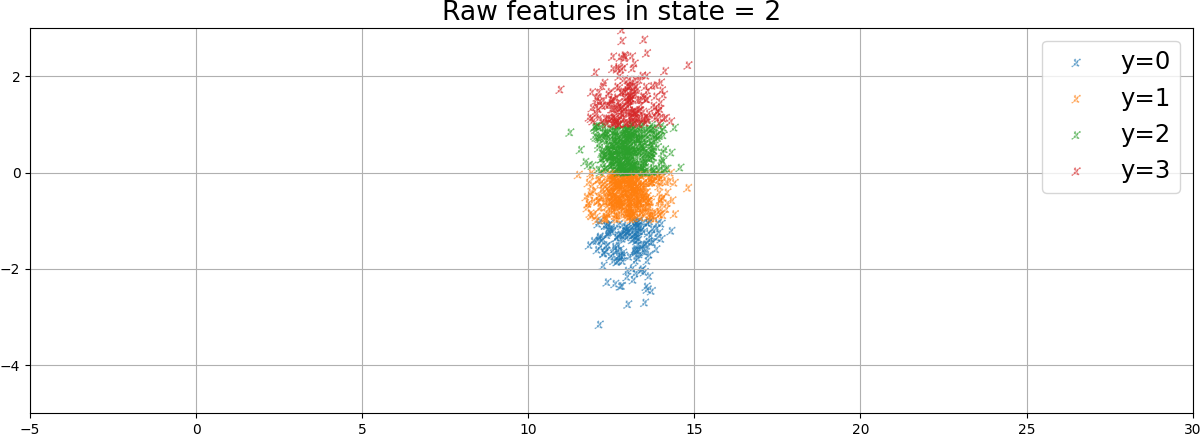

In [13]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state_2.png') 

In [14]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_df[['temperature_1', 'temperature_2']].values
y = state_2_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1000, 2)
[[13.446886   -0.5524145 ]
 [12.467339   -0.45650953]
 [12.240645    1.4870306 ]
 ...
 [12.692524    0.9869254 ]
 [12.897209   -0.37490278]
 [14.0738535   1.120598  ]]
y: (1000,)
[1 1 3 3 1 2 2 1 0 1 2 1 1 2 1 3 2 2 1 0 0 2 2 1 2 1 1 0 2 2 0 0 2 2 1 2 0
 2 2 2 1 3 0 1 1 0 3 1 3 1 3 1 0 2 1 2 2 1 2 2 2 1 3 2 1 0 0 1 1 1 3 1 1 1
 0 2 1 1 2 3 1 2 2 1 2 2 3 1 0 1 0 1 1 2 2 0 0 0 1 2 2 2 2 2 1 0 2 1 3 2 1
 2 3 1 3 3 2 2 0 2 2 0 3 1 3 1 2 1 0 1 2 1 1 2 0 2 2 2 2 1 2 2 1 1 1 3 3 1
 3 3 3 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1 1 1 1 2 1 1 2 3 3 0 1 2 2 0 2 0 2 2
 2 2 1 1 2 3 2 1 1 0 1 2 2 2 0 1 2 0 1 2 2 1 1 2 1 2 3 0 1 3 2 0 2 1 1 0 2
 3 2 1 2 3 2 3 3 2 1 1 3 3 1 0 2 1 2 1 1 1 3 1 2 3 2 1 3 1 3 0 1 3 2 0 1 3
 1 3 2 3 0 2 2 1 1 1 1 3 2 1 2 2 1 3 3 2 2 2 1 3 1 0 1 2 1 3 2 1 2 3 0 3 2
 3 2 1 2 1 0 1 2 0 2 1 2 1 2 1 2 2 2 3 2 1 1 1 0 3 2 2 2 1 3 2 0 2 1 3 2 3
 1 1 3 3 1 0 3 2 1 0 2 2 1 3 2 2 2 3 3 3 2 0 2 1 3 1 0 3 1 1 1 2 1 2 0 3 2
 1 3 0 3 3 2 3 1 2 3 2 2 2 1 1 1 3 0 0 2 2 1 0 2 2 3 2 2 0

In [15]:
# Normalize X

# X = (X - X.mean(axis=0)) / X.std(axis=0)
# X

## Model

In [19]:
clf1 = OrdinalRegression()
clf1.fit(X, y, use_gradient_tape=False, epochs=200, learning_rate=1e-2, dist='og')

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/200
32/32 [==============================] - 0s 1ms/step - loss:

In [20]:
clf2 = OrdinalRegression()
clf2.fit(X, y, use_gradient_tape=False, epochs=200, learning_rate=1e-2, dist='og2')

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/200
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/200
32/32 [==============================] - 0s 1ms/step - loss:

In [21]:
clf3 = OrdinalRegression()
clf3.fit(X, y, use_gradient_tape=False, epochs=200, learning_rate=1e-2, dist='ol')

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 2.5703
Epoch 2/200
32/32 [==============================] - 0s 934us/step - loss: 1.1631
Epoch 3/200
32/32 [==============================] - 0s 886us/step - loss: 0.9986
Epoch 4/200
32/32 [==============================] - 0s 864us/step - loss: 0.8970
Epoch 5/200
32/32 [==============================] - 0s 857us/step - loss: 0.8196
Epoch 6/200
32/32 [==============================] - 0s 862us/step - loss: 0.7577
Epoch 7/200
32/32 [==============================] - 0s 878us/step - loss: 0.7070
Epoch 8/200
32/32 [==============================] - 0s 881us/step - loss: 0.6643
Epoch 9/200
32/32 [==============================] - 0s 873us/step - loss: 0.6276
Epoch 10/200
32/32 [==============================] - 0s 924us/step - loss: 0.5950
Epoch 11/200
32/32 [==============================] - 0s 849us/step - loss: 0.5670
Epoch 12/200
32/32 [==============================] - 0s 885us/step - loss: 0.5425
Epoch 13/200
32

# Model Comparison

## OrderedGuassian(1)

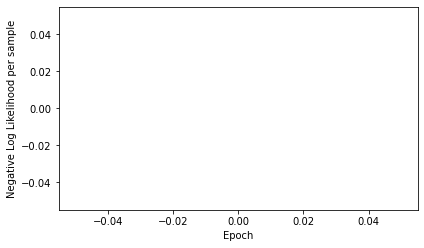

In [22]:
clf1.plot_losses(flatten_epochs=True)

In [23]:
clf1.model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
_________________________________________________________________
distribution_lambda_3 (Distr ((None, 1), (None, 1))    3         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [24]:
clf1.model.trainable_variables

[<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[nan],
        [nan]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([nan, nan, nan], dtype=float32)>]

In [25]:
y_predict = clf1.predict(X)

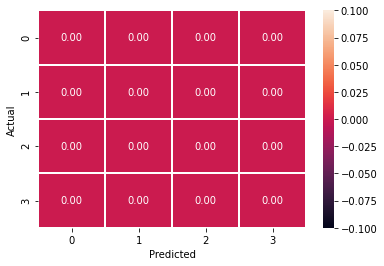

In [26]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 
ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## OrderedGuassian2

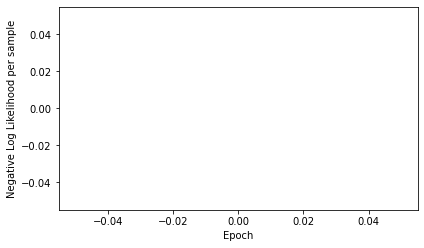

In [27]:
clf2.plot_losses(flatten_epochs=True)

In [28]:
clf2.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
distribution_lambda_4 (Distr ((None, 1), (None, 1))    3         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [29]:
clf2.model.trainable_variables

[<tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[nan],
        [nan]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([nan, nan, nan], dtype=float32)>]

In [30]:
y_predict = clf2.predict(X)

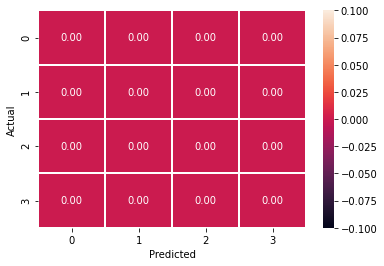

In [31]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 
ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## OrderedLogistic

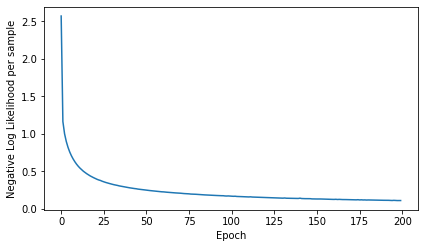

In [32]:
clf3.plot_losses(flatten_epochs=True)

In [33]:
clf3.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
_________________________________________________________________
distribution_lambda_5 (Distr ((None, 1), (None, 1))    3         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [34]:
clf3.model.trainable_variables

[<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.04662225],
        [13.495632  ]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-0.5286117], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-14.667827 ,  -1.2678663,  12.274976 ], dtype=float32)>]

In [35]:
y_predict = clf3.predict(X)

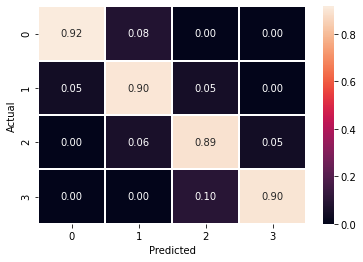

In [36]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 
ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

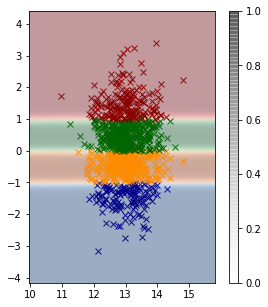

In [37]:
plot_model(clf3)

--------------
# IGNORE BELOW
--------------

## Sequence State 2--Gaussian with label noise

### Toy Data

In [ ]:
state_2_with_noise_df = pd.read_csv('../toydata/simulated_data/features_from_state2_with_noise.csv')
state_2_with_noise_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state2_with_noise.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_with_noise_df[['temperature_1', 'temperature_2']].values
y = state_2_with_noise_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = None, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Crescent Shapes

### Toy Data

In [ ]:
cresent_df = pd.read_csv('../toydata/ordinal_data/crescent_shapes_4_labels.csv')
cresent_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/crescent_shapes_4_labels.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = cresent_df[['x1', 'x2']].values
y = cresent_df['label'].values.astype(int)
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Circles

### Toy Data, Point Density Factor = 1

In [ ]:
circles_df = pd.read_csv('../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.csv')
circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = circles_df[['x1', 'x2']].values
y = circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [ ]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 10, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Stacked Gaussians

### Toy Data, Point Density Factor = 1, Mean scale = 4

In [ ]:
stacked_gaussian_df = pd.read_csv('../toydata/ordinal_data/stacked_gaussian_4_labels_1_densityfactor.csv')
stacked_gaussian_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/stacked_gaussian_4_labels_1_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = stacked_gaussian_df[['x1', 'x2']].values
y = stacked_gaussian_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
log_proba = clf.predict_log_proba(X)
type(proba)

In [ ]:
logsumexp(log_proba, axis=1)

In [ ]:
np.log(np.sum(proba, axis=1))

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

In [ ]:
min_variance = clf.find_global_minimum_variance(iter=50)

### Toy Data, Point Density Factor = 0.5, Mean scale = 2

In [ ]:
stacked_gaussian_df = pd.read_csv('../toydata/ordinal_data/stacked_gaussian_4_labels_0.5_densityfactor_2_meanscale.csv')
stacked_gaussian_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/stacked_gaussian_4_labels_0.5_densityfactor_2_meanscale.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = stacked_gaussian_df[['x1', 'x2']].values
y = stacked_gaussian_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

In [ ]:
min_variance = clf.find_global_minimum_variance()

In [ ]:
clf.grid_search_variance()

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [ ]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

# Misc. Testing

In [ ]:
X = np.array(
    [
        [-80,-90,-100],
        [4,5,6],
        [80,90,100],
        [-81,-93,-99],
        [4.2,5.1,6.3],
        [81,93,99],
        [-87,-94,-98],
        [4.1,5.2,6.5],
        [87,94,98],
    ]
)
y = np.array(
    [
        0,
        1,
        2,
        0,
        1,
        2,
        0,
        1,
        2,
    ]
)
w_inits = []
for i in range(100):
    w_inits.append(np.random.rand(3) * np.random.randint(0,10))

In [ ]:
clf = OrdinalRegression()
clf.set_params(R = 3, N = 3, cut_points  = np.array([-np.inf, -3, 3, np.inf]))

In [ ]:
# for w in w_inits:
#     print(clf.log_likelihood(w, X, y))

In [ ]:
clf.fit(X, y)

In [ ]:
best_w = clf.w

In [ ]:
clf.predict(X)

## Softplus

In [ ]:
test_arr = np.absolute(np.random.normal(size=3))
print(test_arr)
inverse_arr = softplus_inv(test_arr)
print(inverse_arr)
recovered = softplus(inverse_arr)
print(recovered)

In [ ]:
softplus_inv(0.5969)

In [ ]:
softplus(np.array([1,2,3]))

In [ ]:
arr = np.array([1,2,10, 50])

In [ ]:
arr.shape

In [ ]:
softplus(arr)

In [ ]:
np.array(1)[np.newaxis].shape